# User Adoption Analysis: Relax Inc.

## 1. Load Datasets

In [4]:
# import base libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# load user dataset
users = pd.read_csv('takehome_users.csv', encoding='latin-1')
# load engagement dataset
engage = pd.read_csv('takehome_user_engagement.csv', encoding='latin-1')

### 1.1. Users Dataset

In [6]:
# rename columns
users.rename(columns={'object_id':'user_id',
                      'creation_time':'created_time',
                      'last_session_creation_time':'last_session',
                      'opted_in_to_mailing_list':'opted_mail', 
                      'enabled_for_marketing_drip':'enable_market',
                      'invited_by_user_id':'invite_user_id'}, inplace=True)

# display users dataset & datatypes
display(users)
print('dtypes:\n{}'.format(users.dtypes.to_string()))

,user_id,created_time,name,email,creation_source,last_session,opted_mail,enable_market,org_id,invite_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


dtypes:
user_id              int64
created_time        object
name                object
email               object
creation_source     object
last_session       float64
opted_mail           int64
enable_market        int64
org_id               int64
invite_user_id     float64


### 1.2. User Engagement Dataset 

In [7]:
# user engagement dataset
display(engage)

# data-types
print('dtypes:\n{}'.format(engage.dtypes.to_string()))

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


dtypes:
time_stamp    object
user_id        int64
visited        int64


## 2. Data Preprocessing & Exploration
### 2.1. Dealing with Dates
#### Data Types (object to datetime)

In [83]:
# convert user created_time to datetime
users.created_time = pd.to_datetime(users.created_time)
print('- Users Dataset -\ncreated_time: {}'.format(users.dtypes.created_time))

# convert engagement time_stamp to datetime
engage.time_stamp = pd.to_datetime(engage.time_stamp)
print('\n- Engagement Dataset -\ntime_stamp: {}'.format(engage.dtypes.time_stamp))

- Users Dataset -
created_time: datetime64[ns]

- Engagement Dataset -
time_stamp: datetime64[ns]


#### datetimes to dates

In [9]:
# convert time_stamp to date
date_engage = engage.rename(columns={'time_stamp':'date'})
date_engage.date = date_engage.date.dt.date

# keep only one login per day for each user
date_engage = date_engage.drop_duplicates(['date', 'user_id']).sort_values('date')

# display
display(date_engage)

,date,user_id,visited
26821,2012-05-31,1693,1
59486,2012-05-31,3428,1
178140,2012-05-31,10012,1
175638,2012-05-31,9899,1
179759,2012-06-01,10163,1
...,...,...,...
67195,2014-06-04,3869,1
177273,2014-06-04,9968,1
3803,2014-06-04,203,1
130927,2014-06-04,7511,1


### 2.2. Login Dates (Pivot Table)

In [10]:
# start/end dates
start = date_engage.date.head(1).values[0]
end = date_engage.date.tail(1).values[0]

# create date_range index
dates_idx = pd.date_range(start, end)

# pivot date engagement 
date_piv = date_engage.pivot(columns='user_id', values='visited', index='date').reindex(dates_idx)
# replace missing user visits w/ 0
date_piv = date_piv.fillna(0).astype('int')
# display pivot table
display(date_piv)

user_id,1,2,3,4,5,6,7,10,11,13,...,11989,11990,11991,11992,11995,11996,11997,11998,11999,12000
2012-05-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-06-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-06-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2012-06-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-06-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-02,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-06-03,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-06-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-06-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Visualize Weekday Logins 

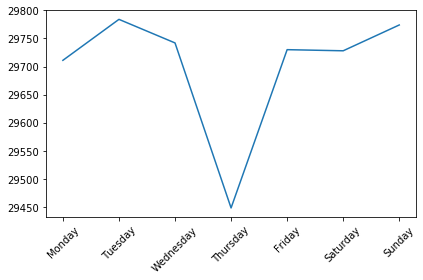

,Logins,Weekday,Name
Date,,,
2012-05-31,4,3,Thursday
2012-06-01,6,4,Friday
2012-06-02,9,5,Saturday
2012-06-03,11,6,Sunday
2012-06-04,11,0,Monday
...,...,...,...
2014-06-02,404,0,Monday
2014-06-03,398,1,Tuesday
2014-06-04,373,2,Wednesday


In [85]:
# sum number of logins per day & create df (date_total)
date_total = pd.DataFrame(date_piv.sum(axis=1), columns=['Logins'])
# rename index
date_total.index.names = ['Date']

# append weekday & name of weekday as columns
date_total['Weekday'] = date_total.index.weekday
date_total['Name'] = date_total.index.day_name()

# group by weekday and obtain total sum
weekday = date_total.groupby(by='Weekday').Logins.sum()

# create weekday to weekday_name map for plotting
days_map = dict(date_total[['Weekday', 'Name']].values)

# plot weekday login trends
plt.plot(weekday.index, weekday)
# map weekday # to name & rotate ticks
plt.xticks(list(days_map.keys()), 
           list(days_map.values()), 
           rotation=45)
plt.tight_layout()
plt.show()

# date_total dataframe w/ logins per day
display(date_total)

### 2.3. User-Login Counts & Adopted Users

In [11]:
# rolling seven-day period login counts
seven_day = date_piv.rolling(7).sum().fillna(0).astype('int')

# seven-day period with >= 3 logins; a.k.a. adopted
adopted_days = (seven_day >= 3).astype('int')

# display seven_day df
print('_\n1. Seven-day Period Login Counts')
display(seven_day.iloc[620:625])

# display adopted_days df
print('_\n2. Classified as Adopted')
display(adopted_days.iloc[620:625])

_
1. Seven-day Period Login Counts


user_id,1,2,3,4,5,6,7,10,11,13,...,11989,11990,11991,11992,11995,11996,11997,11998,11999,12000
2014-02-10,0,2,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-02-11,0,2,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-02-12,0,2,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-02-13,0,3,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-02-14,0,3,0,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0


_
2. Classified as Adopted


user_id,1,2,3,4,5,6,7,10,11,13,...,11989,11990,11991,11992,11995,11996,11997,11998,11999,12000
2014-02-10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-02-11,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-02-12,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-02-13,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-02-14,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Adopted Users

In [12]:
# adopted users
adopted = (adopted_days.sum() >= 1).astype('int')
# create dataframe to merge w/ engagement
adopted = pd.DataFrame({'adopted':adopted}).reset_index()
# display adopted
display(adopted.head())

,user_id,adopted
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [13]:
# merge users & adopted on user_id
users_adopted = pd.merge(users, adopted, how='outer', on='user_id').fillna(0)
# display merged dataset
display(users_adopted.head())

,user_id,created_time,name,email,creation_source,last_session,opted_mail,enable_market,org_id,invite_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


### 2.4. Categorizing Email Domains
#### Email Domain Counts

In [14]:
# get user email domains
email_dom = users.email.apply(lambda em: re.split("@|\.", em)[1])
# show top 10 domains used
print('Top 10 Email Domains:\n\n{}'.format(email_dom.value_counts().head(10).to_string()))

Top 10 Email Domains:

gmail         3562
yahoo         2447
jourrapide    1259
cuvox         1202
gustr         1179
hotmail       1165
xybhi            2
dqwln            2
mumdc            2
oqpze            2


#### Top Domains

In [15]:
# domains w/ 1000+ counts
top_dom = set(email_dom.value_counts().head(6).index)
# keep top domains & set rare domains to 'other'
email_dom = email_dom.apply(lambda dom: dom if dom in top_dom else 'other')

# replace users email column w/ processed domains
users_adopted.email = email_dom
# display df w/ updated email column
display(users_adopted.head())

,user_id,created_time,name,email,creation_source,last_session,opted_mail,enable_market,org_id,invite_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,yahoo,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,gustr,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,gustr,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,yahoo,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,yahoo,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


### 2.5. Convert Dates to Integers

In [16]:
print('created_time & last_session |\n----------------------------')

# convert last_session to correct datetime
users_adopted.last_session = pd.to_datetime(users.last_session * 10**9).dt.date
# convert created_time to datetime
users_adopted.created_time = users.created_time.dt.date

# display users_adopted w/ date columns converted to dt
print('_\n1.Converted to Datetime Dates')
display(users_adopted.head())


# create date-index mapping dict
map_dates = pd.Series(range(len(dates_idx)), index=dates_idx.date).to_dict()
# map last session dates to int; -1 for NaN last sessions
users_adopted.last_session = users_adopted.last_session.map(map_dates).fillna(-1)
# map created_time dates to int
users_adopted.created_time = users_adopted.created_time.map(map_dates)

# display users_adopted w/ date columns mapped to int
print('_\n2. Dates Mapped to Integers:')
display(users_adopted.astype('int', errors='ignore', inplace=True).head())

created_time & last_session |
----------------------------
_
1.Converted to Datetime Dates


,user_id,created_time,name,email,creation_source,last_session,opted_mail,enable_market,org_id,invite_user_id,adopted
0,1,2014-04-22,Clausen August,yahoo,GUEST_INVITE,2014-04-22,1,0,11,10803.0,0.0
1,2,2013-11-15,Poole Matthew,gustr,ORG_INVITE,2014-03-31,0,0,1,316.0,1.0
2,3,2013-03-19,Bottrill Mitchell,gustr,ORG_INVITE,2013-03-19,0,0,94,1525.0,0.0
3,4,2013-05-21,Clausen Nicklas,yahoo,GUEST_INVITE,2013-05-22,0,0,1,5151.0,0.0
4,5,2013-01-17,Raw Grace,yahoo,GUEST_INVITE,2013-01-22,0,0,193,5240.0,0.0


_
2. Dates Mapped to Integers:


,user_id,created_time,name,email,creation_source,last_session,opted_mail,enable_market,org_id,invite_user_id,adopted
0,1,691,Clausen August,yahoo,GUEST_INVITE,691.0,1,0,11,10803.0,0.0
1,2,533,Poole Matthew,gustr,ORG_INVITE,669.0,0,0,1,316.0,1.0
2,3,292,Bottrill Mitchell,gustr,ORG_INVITE,292.0,0,0,94,1525.0,0.0
3,4,355,Clausen Nicklas,yahoo,GUEST_INVITE,356.0,0,0,1,5151.0,0.0
4,5,231,Raw Grace,yahoo,GUEST_INVITE,236.0,0,0,193,5240.0,0.0


### 2.6. Get Dummy Variables for Categorical Features
#### Bin Continuous Categorical Features

In [17]:
# bin invite_user_id column
users_adopted.invite_user_id = pd.cut(users_adopted.invite_user_id, bins=10, labels=range(10))

# bin org_id column
users_adopted.org_id = pd.cut(users_adopted.org_id, bins=10, labels=range(10))

In [33]:
# get dummy variables for categorical columns
features = pd.get_dummies(users_adopted, 
                          columns=['email', 'creation_source', 
                                    'org_id', 'invite_user_id'], 
                          drop_first=True)

# create target variable (adopted)
target = features.adopted
# create features dataset
features = features.drop(columns=['user_id', 'name', 'created_time', 'last_session', 'adopted']).astype('int')

display(features)

,opted_mail,enable_market,email_gmail,email_gustr,email_hotmail,email_jourrapide,email_other,email_yahoo,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,...,org_id_9,invite_user_id_1,invite_user_id_2,invite_user_id_3,invite_user_id_4,invite_user_id_5,invite_user_id_6,invite_user_id_7,invite_user_id_8,invite_user_id_9
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
11996,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11997,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11998,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## 3. Feature Importances
### 3.1. Fit ExtraTrees Classifier

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

# create ExtraTrees Classifier instance
model = ExtraTreesClassifier(criterion='gini',n_estimators=100, 
                             max_features='sqrt', n_jobs=-1, verbose=1)

# fit ExtraTrees to obtain individual feature importances
model.fit(features, target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=1,
                     warm_start=False)

### 3.2. Obtain Feature Importances

In [35]:
# create feature importance df
importances = pd.DataFrame({'Feature': features.columns, 'Importance': model.feature_importances_})
# remove dummy variable column names
importances.Feature = importances.Feature.apply(lambda f: f.split('_', 1)[0])
# average dummy variable importance
avg_importance = importances.groupby(by='Feature').mean().sort_values(by='Importance', ascending=False)

# display final average importances for each feature
display(avg_importance)

,Importance
Feature,
opted,0.117783
enable,0.092067
creation,0.031910
email,0.029082
invite,0.027206
org,0.027018


> **Feature Importances**
> As it can be seen from the table above, whether a user has opted in to the mailing list or enabled the marketing drip are the two most important factors at predicting the user's adoption of the product.